In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

#import data
Test = pd.read_csv("au_test.csv")
Train = pd.read_csv("au_train.csv")

In [39]:
#Check for missing data
Test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [40]:
Train.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [41]:
#Exploratory Analysis
Train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [42]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
Train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
Test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [45]:
#Change class to binary (0 for above 50k, 1 for below 50k)
Train['class'] = pd.get_dummies(Train['class'])
Test['class'] = pd.get_dummies(Test['class'])
Train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [46]:
#Change sex to binary (0 for male, 1 for female)
Train['sex'] = pd.get_dummies(Train['sex'])
Test['sex'] = pd.get_dummies(Test['sex'])

Train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,1


In [47]:
Test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,1,0,0,30,United-States,1


In [48]:
#Encode the columns of data that are categorical. Since the data is non-ordinal (nominal), Target Encoding was the method of choice
countryen = Train.groupby('native-country')['class'].mean().reset_index()
Train = Train.merge(countryen, how='left', on='native-country')
Train.rename(columns = {'class_x':'class', 'class_y':'country-encoded'}, inplace = True)
Train.drop('native-country', axis=1, inplace=True)

countryen = Test.groupby('native-country')['class'].mean().reset_index()
Test = Test.merge(countryen, how='left', on='native-country')
Test.rename(columns = {'class_x':'class', 'class_y':'country-encoded'}, inplace = True)
Test.drop('native-country', axis=1, inplace=True)


In [49]:
maritalstatusen = Train.groupby('marital-status')['class'].mean().reset_index()
Train = Train.merge(maritalstatusen, how='left', on='marital-status')
Train.rename(columns = {'class_x':'class', 'class_y':'marital-status-encoded'}, inplace = True)
Train.drop('marital-status', axis=1, inplace=True)

maritalstatusen = Test.groupby('marital-status')['class'].mean().reset_index()
Test = Test.merge(maritalstatusen, how='left', on='marital-status')
Test.rename(columns = {'class_x':'class', 'class_y':'marital-status-encoded'}, inplace = True)
Test.drop('marital-status', axis=1, inplace=True)


In [50]:
occupationen = Train.groupby('occupation')['class'].mean().reset_index()
Train = Train.merge(occupationen, how='left', on='occupation')
Train.rename(columns = {'class_x':'class', 'class_y':'occupation-encoded'}, inplace = True)
Train.drop('occupation', axis=1, inplace=True)

occupationen = Test.groupby('occupation')['class'].mean().reset_index()
Test = Test.merge(occupationen, how='left', on='occupation')
Test.rename(columns = {'class_x':'class', 'class_y':'occupation-encoded'}, inplace = True)
Test.drop('occupation', axis=1, inplace=True)


In [51]:
relationshipen = Train.groupby('relationship')['class'].mean().reset_index()
Train = Train.merge(relationshipen, how='left', on='relationship')
Train.rename(columns = {'class_x':'class', 'class_y':'relationship-encoded'}, inplace = True)
Train.drop('relationship', axis=1, inplace=True)

relationshipen = Test.groupby('relationship')['class'].mean().reset_index()
Test = Test.merge(relationshipen, how='left', on='relationship')
Test.rename(columns = {'class_x':'class', 'class_y':'relationship-encoded'}, inplace = True)
Test.drop('relationship', axis=1, inplace=True)


In [52]:
raceen = Train.groupby('race')['class'].mean().reset_index()
Train = Train.merge(raceen, how='left', on='race')
Train.rename(columns = {'class_x':'class', 'class_y':'race-encoded'}, inplace = True)
Train.drop('race', axis=1, inplace=True)

raceen = Test.groupby('race')['class'].mean().reset_index()
Test = Test.merge(raceen, how='left', on='race')
Test.rename(columns = {'class_x':'class', 'class_y':'race-encoded'}, inplace = True)
Test.drop('race', axis=1, inplace=True)


In [53]:
workclassen = Train.groupby('workclass')['class'].mean().reset_index()
Train = Train.merge(workclassen, how='left', on='workclass')
Train.rename(columns = {'class_x':'class', 'class_y':'workclass-encoded'}, inplace = True)
Train.drop('workclass', axis=1, inplace=True)

workclassen = Test.groupby('workclass')['class'].mean().reset_index()
Test = Test.merge(workclassen, how='left', on='workclass')
Test.rename(columns = {'class_x':'class', 'class_y':'workclass-encoded'}, inplace = True)
Test.drop('workclass', axis=1, inplace=True)


In [54]:
#Although education is given a numeric value since it is ordinal, use target encoding on education to see which method results in higher accuracy
educationen = Train.groupby('education')['class'].mean().reset_index()
Train = Train.merge(educationen, how='left', on='education')
Train.rename(columns = {'class_x':'class', 'class_y':'education-encoded'}, inplace = True)
Train.drop('education', axis=1, inplace=True)

educationen = Test.groupby('education')['class'].mean().reset_index()
Test = Test.merge(educationen, how='left', on='education')
Test.rename(columns = {'class_x':'class', 'class_y':'education-encoded'}, inplace = True)
Test.drop('education', axis=1, inplace=True)


In [55]:
Train.head()


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,class,country-encoded,marital-status-encoded,occupation-encoded,relationship-encoded,race-encoded,workclass-encoded,education-encoded
0,39,77516,13,0,2174,0,40,1,0.754165,0.954039,0.865517,0.896930,0.74414,0.728043,0.585247
1,50,83311,13,0,0,0,13,1,0.754165,0.553152,0.515986,0.551429,0.74414,0.715073,0.585247
2,38,215646,9,0,0,0,40,1,0.754165,0.895791,0.937226,0.896930,0.74414,0.781327,0.840491
3,53,234721,7,0,0,0,40,1,0.754165,0.553152,0.937226,0.551429,0.87612,0.781327,0.948936
4,28,338409,13,1,0,0,40,1,0.736842,0.553152,0.550966,0.524872,0.87612,0.781327,0.585247


In [56]:
Test.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,class,country-encoded,marital-status-encoded,occupation-encoded,relationship-encoded,race-encoded,workclass-encoded,education-encoded
0,25,226802,7,0,0,0,40,1,0.759719,0.955466,0.880392,0.982491,0.885330,0.783764,0.949765
1,38,89814,9,0,0,0,50,1,0.759719,0.555315,0.883065,0.551127,0.749749,0.783764,0.843271
2,28,336951,12,0,0,0,40,0,0.759719,0.555315,0.709581,0.551127,0.749749,0.702780,0.722846
3,44,160323,10,0,7688,0,40,0,0.759719,0.555315,0.880392,0.551127,0.885330,0.783764,0.811542
4,18,103497,10,1,0,0,30,1,0.759719,0.955466,0.923395,0.982491,0.749749,0.923157,0.811542


In [57]:
#Check for correlation between variables
#Correlation matrix
corr_matrix = Train.corr().round(decimals=2)
corr_matrix

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,class,country-encoded,marital-status-encoded,occupation-encoded,relationship-encoded,race-encoded,workclass-encoded,education-encoded
age,1.00,-0.08,0.04,-0.09,0.08,0.06,0.07,-0.23,-0.05,-0.35,-0.13,-0.36,-0.03,-0.13,-0.11
fnlwgt,-0.08,1.00,-0.04,-0.03,0.00,-0.01,-0.02,0.01,0.12,0.03,0.02,0.03,0.09,0.03,0.03
education-num,0.04,-0.04,1.00,-0.01,0.12,0.08,0.15,-0.34,-0.24,-0.09,-0.48,-0.11,-0.09,-0.15,-0.91
sex,-0.09,-0.03,-0.01,1.00,-0.05,-0.05,-0.23,0.22,0.00,0.42,0.10,0.42,0.11,0.10,0.04
capital-gain,0.08,0.00,0.12,-0.05,1.00,-0.03,0.08,-0.22,-0.02,-0.09,-0.11,-0.09,-0.02,-0.09,-0.16
capital-loss,0.06,-0.01,0.08,-0.05,-0.03,1.00,0.05,-0.15,-0.03,-0.08,-0.08,-0.08,-0.03,-0.04,-0.10
hours-per-week,0.07,-0.02,0.15,-0.23,0.08,0.05,1.00,-0.23,-0.02,-0.22,-0.21,-0.24,-0.05,-0.19,-0.17
class,-0.23,0.01,-0.34,0.22,-0.22,-0.15,-0.23,1.00,0.10,0.45,0.35,0.45,0.10,0.18,0.37
country-encoded,-0.05,0.12,-0.24,0.00,-0.02,-0.03,-0.02,0.10,1.00,0.03,0.12,0.04,0.07,0.04,0.16
marital-status-encoded,-0.35,0.03,-0.09,0.42,-0.09,-0.08,-0.22,0.45,0.03,1.00,0.19,0.97,0.12,0.15,0.12


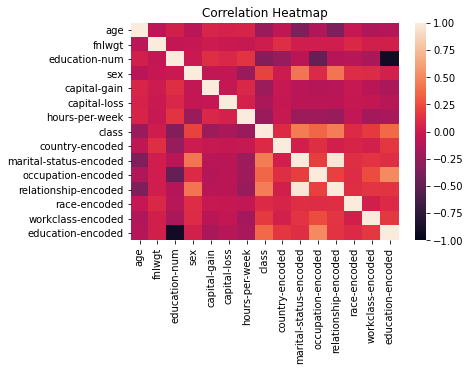

In [58]:
#Use correlation matrix to create a heatmap which will be easier to visualize
heatmap = sns.heatmap(Train.corr(), vmin=-1, vmax=1);
heatmap.set_title('Correlation Heatmap');


In [59]:
#Naive Bayes model
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

X_Train = Train.iloc[:, np.r_[1:7, 8:15]]
Y_Train = Train.iloc[:,[7]]

X_Test = Test.iloc[:, np.r_[1:7, 8:15]]
Y_Test= Test.iloc[:,[7]]

sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

NaiveModel = GaussianNB()
NaiveModel.fit(X_Train, Y_Train)

Y_Prob = NaiveModel.predict_proba(X_Test)[:,1] 
Y_Predicted  =  NaiveModel.predict(X_Test)

Confusion_Matrix = confusion_matrix(Y_Test, Y_Predicted)
Accuracy = accuracy_score(Y_Test,Y_Predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
Confusion_Matrix

array([[ 2142,  1704],
       [ 1038, 11397]])

In [61]:
Accuracy

0.8315828266077022

In [62]:
#AUROC Curve for Naive Bayes
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Test, Y_Prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

auc_roc=metrics.classification_report(Y_Test,Y_Predicted)
auc_roc
auc_roc=metrics.roc_auc_score(Y_Test,Y_Predicted)
auc_roc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Test,Y_Prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8773745682436868

Text(0.5, 0, 'False Positive Rate')

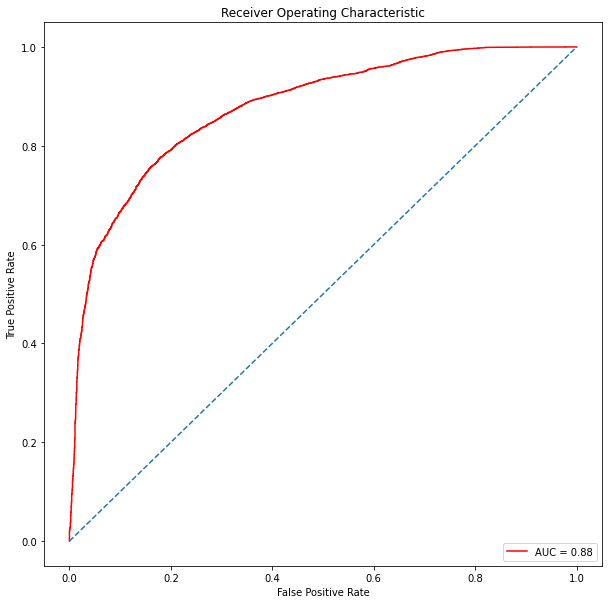

In [63]:
#Plotting Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [64]:
#For the Naive Bayes Algorithm we get an accuracy of 83.16% with 2142 instances being correctly identified as over 50k and 11387 instances correctly identified as under 50k

In [29]:
#Find Best K Value
from sklearn.cluster import KMeans
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_Train)
    distortions.append(kmeanModel.inertia_)

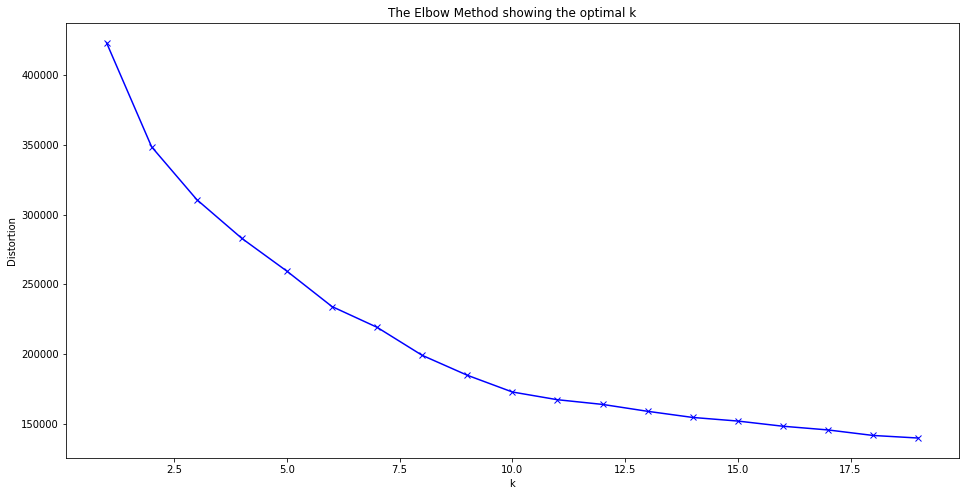

In [30]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
#We can see the elbow occurs around 8, so that should be the optimal value of K

In [32]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_Train,Y_Train)
pred = knn.predict(X_Test)
KNN_Matrix=confusion_matrix(Y_Test,pred)
Accuracy = (knn.score(X_Test, Y_Test))
Y_Prob = knn.predict_proba(X_Test)[:,1] 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [33]:
Accuracy

0.8393833302622689

In [34]:
KNN_Matrix

array([[ 2201,  1645],
       [  970, 11465]])

In [35]:
#AUROC Curve for KNN

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Test, Y_Prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

auc_roc=metrics.classification_report(Y_Test,Y_Predicted)
auc_roc
auc_roc=metrics.roc_auc_score(Y_Test,Y_Predicted)
auc_roc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Test,Y_Prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8649378954651552

Text(0.5, 0, 'False Positive Rate')

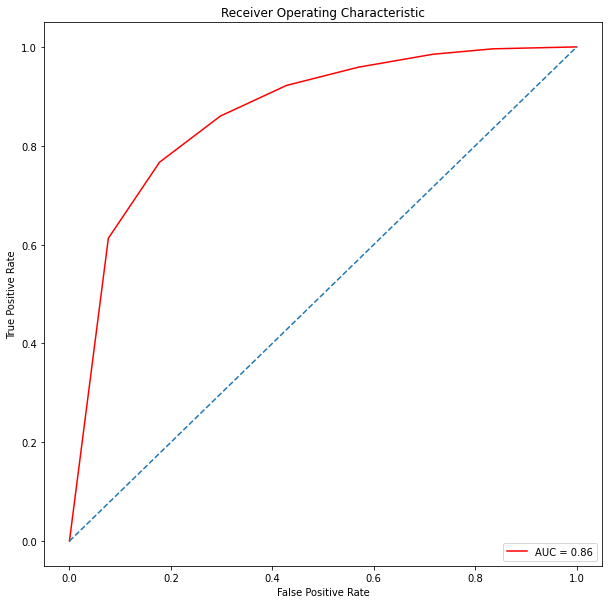

In [36]:
#Plotting Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [37]:
#The accuracy of the KNN model with a K value of 8 provides an accuracy of 83.94% with 2201 instances correctly identified as over 50k and 11465 instances correctly identified as
#under 50k